<a href="https://colab.research.google.com/github/marianegri/Python_DataScience_MachineLearning/blob/main/Numpy/Python_intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Python para Ciências de Dados
---
 

Introdução ao python

In [ ]:
%%file my_file.py
s = "Hello World!"
print(s)

Writing my_file.py


In [ ]:
run my_file.py

Hello World!


In [ ]:
%timeit 10*3

The slowest run took 79.50 times longer than the fastest. This could mean that an intermediate result is being cached.
100000000 loops, best of 5: 13.1 ns per loop


In [ ]:
def disemvowel(string_):
    string_ = string_.lower()
    string_result = ""
    for i in list(string_):
        if i not in "aáàeéèiíìoóòuúù":
            string_result += i
    return string_result

In [ ]:
disemvowel("Olá, como vai voce")

'l, cm v vc'

In [ ]:
from string import capwords as disemvowel

In [ ]:
disemvowel("olá are't")

"Olá Are't"

# Numpy e matplotlib

In [ ]:
import numpy as np

In [ ]:
V = np.linspace(0,1, 6).reshape(2,3)
V

array([[0. , 0.2, 0.4],
       [0.6, 0.8, 1. ]])

In [ ]:
len(V)

2

In [ ]:
V.ndim

2

In [ ]:
V.shape

(2, 3)

In [ ]:
B = np.arange(1,12,2, dtype=int).reshape(3,2)
B

array([[ 1,  3],
       [ 5,  7],
       [ 9, 11]])

In [ ]:
print(len(B))
print(V.ndim)
print(V.shape)

3
2
(2, 3)


In [ ]:
import matplotlib.pyplot as plt

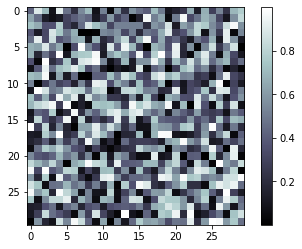

In [ ]:
image = np.random.rand(30, 30)
plt.imshow(image, cmap=plt.cm.bone)    
plt.colorbar() 

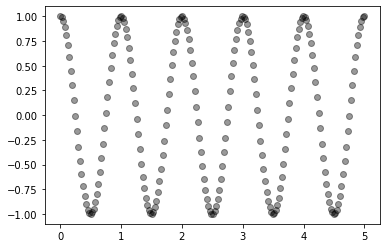

In [ ]:
import math
t = np.linspace(0, 5, 200)
fun = np.cos(2*np.pi*t)

plt.scatter(t, fun, c='black', alpha=0.4)

## Slice

In [ ]:
image[2:10:2,::6]

array([[0.73595226, 0.17987096, 0.52663796, 0.51680375, 0.76791236],
       [0.46083604, 0.64415531, 0.61220342, 0.64910006, 0.37597688],
       [0.67758004, 0.69295773, 0.74369446, 0.99857318, 0.9095335 ],
       [0.07957054, 0.91667659, 0.12726103, 0.52563109, 0.56156202]])

## Copias de variáveis (compartilha memória ou não)

In [ ]:
a = np.arange(10)
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
b = a[::3]
b

array([0, 3, 6, 9])

In [ ]:
np.may_share_memory(b,a)

True

In [ ]:
b[2] = 100

In [ ]:
print('a = ', a)
print('b = ', b)

a =  [  0   1   2   3   4   5 100   7   8   9]
b =  [  0   3 100   9]


Para resolver o compartilhamento de memória:

In [ ]:
a = np.arange(10)
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
c = a[::2].copy()
c

array([0, 2, 4, 6, 8])

In [ ]:
np.may_share_memory(a,c)

False

In [ ]:
c[2] = 1000

In [ ]:
print('a = ', a)
print('c = ', c)

a =  [0 1 2 3 4 5 6 7 8 9]
c =  [   0    2 1000    6    8]


## Mascara booleana

In [ ]:
a = np.arange(15)
a

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [ ]:
mask = (a%2 == 0) ## Mascara para selecionar numeros pares
mask

array([ True, False,  True, False,  True, False,  True, False,  True,
       False,  True, False,  True, False,  True])

In [ ]:
a[mask]

array([ 0,  2,  4,  6,  8, 10, 12, 14])

 Somando colunas em matrizes

In [ ]:
M = np.arange(9).reshape(3,3)
M

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [ ]:
# Somar as colunas (eixo 0)
M.sum(axis = 0)

array([ 9, 12, 15])

In [ ]:
# Somar as linhas (eixo 1)
M.sum(axis = 1)

array([ 3, 12, 21])

In [ ]:
M.cumsum(axis = 1)

array([[ 0,  1,  3],
       [ 3,  7, 12],
       [ 6, 13, 21]])

In [ ]:
# Operações lógicas
# and
np.all([2==2, 1==1, 3==3])

True

In [ ]:
# and
np.all([2==2, 1==2, 3==3])

False

In [ ]:
# or
np.any([1==1, 2==3, 4==7])

True

In [ ]:
# or
np.any([1==4, 2==3, 4==7])

False

## Exercício de passeio aleatório

In [ ]:
%%file passeio.py
import numpy as np
import matplotlib.pyplot as plt

n_stories = 1000     # number of walkers
t_max     = 200      # time during which we follow the walker

t         = np.arange(t_max)
steps     = 2 * np.random.randint(0, 2, (n_stories, t_max)) -1  # +1 because the high value is exclusive

positions = steps.cumsum(axis=1) # axis = 1: soma as linhas

sq_distance = positions**2

mean_sq_distance = np.mean(sq_distance, axis=0)

plt.plot(t, np.sqrt(mean_sq_distance), 'g.', t, np.sqrt(t), 'y-') 
plt.xlabel("t") 
plt.ylabel(r"$\sqrt{\langle (\delta x)^2 \rangle}$") 


Overwriting passeio.py


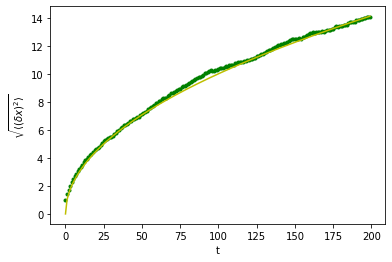

In [ ]:
run passeio.py